In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import keras
print(keras.__version__)

3.4.1


In [3]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,17.993254,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.003704,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.359463,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.279356,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.243282,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.048599,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.687866,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.034058,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,137.943039,20661000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

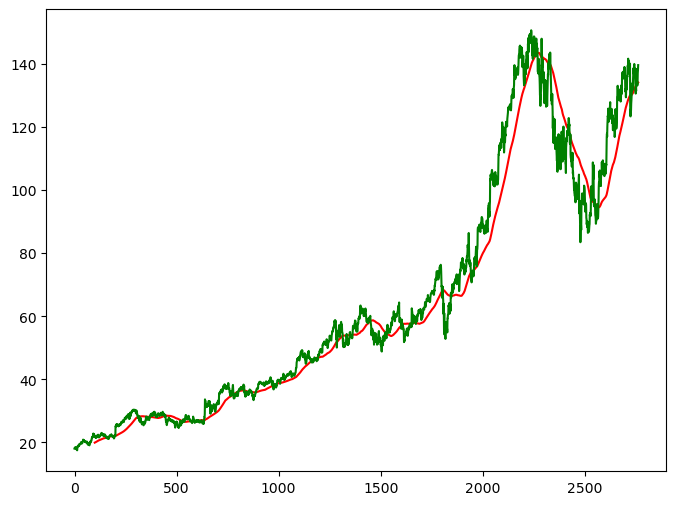

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

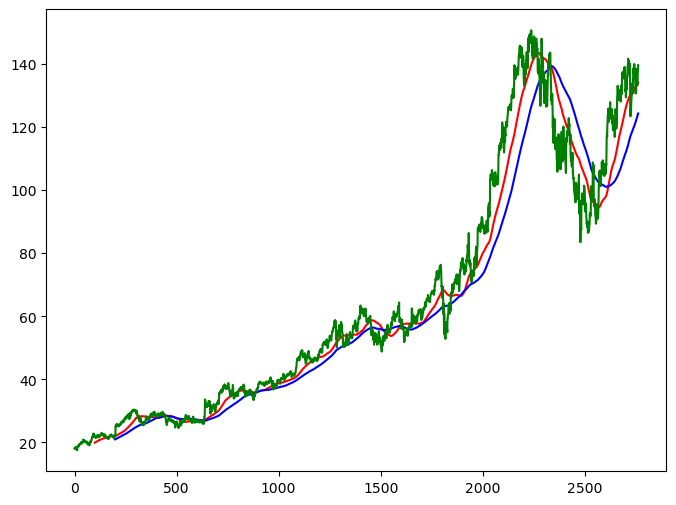

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2209

In [13]:
data_train.shape[0]

2209

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\aman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.0458
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0038
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0034
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0035
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0041
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0033
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0033
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0026
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0035
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0026
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0023
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0026
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0028
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - l

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

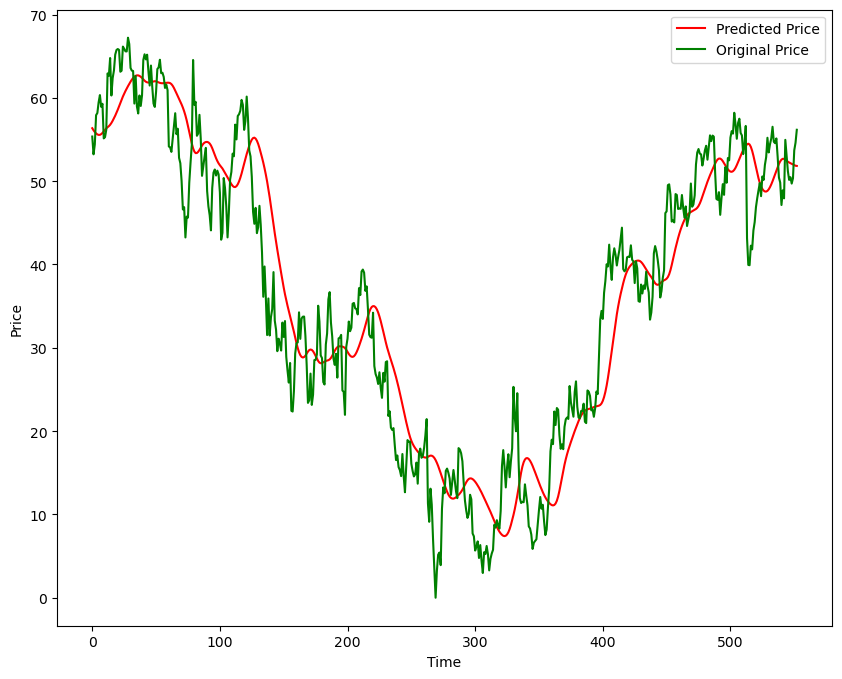

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')